In [1]:
import pandas as pd
import numpy as np
from pandas import json_normalize
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
from scipy.stats import norm

In [2]:
df = pd.read_csv (r'tracks_file.csv',sep='\t')

In [11]:
df['duration'].value_counts()

30000     820
192026     12
208039      9
216033      7
196937      7
         ... 
199941      1
307019      1
393953      1
444212      1
205315      1
Name: duration, Length: 10780, dtype: int64

In [13]:
df['genre'].value_counts()

Pop              311
Country          291
Hip-hop & Rap    264
Dance & EDM      260
Electronic       239
                ... 
tech trance        1
TEXCORE            1
Foliage            1
Rain Sound         1
imagineDragon      1
Name: genre, Length: 2210, dtype: int64

In [27]:
subsetDataFrame = df[df['genre'].isin(['Pop','Country','Hip-hop & Rap','Dance & EDM','Electronic'])]
subsetDataFrame

,album,artwork_url,caption,comment_count,commentable,comments,created_at,description,display_date,download_count,...,streamable,tag_list,title,track_authorization,track_format,uri,urn,user,user_id,waveform_url
15,NaN,https://i1.sndcdn.com/artworks-ObstznpU25CNSNn...,NaN,10.0,True,"958889185,339504867,1001743396,891186760,98567...",2021-04-15T22:00:08Z,Sech - Wao (Official Audio) Listen to it: http...,2021-04-15T22:00:08Z,0.0,...,True,"Sech ,stuffed animal ,panama ,sech music ,When...",Sech - Wao (Audio Oficial),eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/1030389865,soundcloud:tracks:1030389865,966249775,966249775,https://wave.sndcdn.com/9TBgFazc1XJH_m.json
19,NaN,https://i1.sndcdn.com/artworks-j6guL20A8kZJlDQ...,Zedd - Live @ EDC Las Vegas 2021,1.0,True,910192351,2021-11-02T02:40:22Z,Zedd - Live @ EDC Las Vegas 2021,2021-11-02T02:40:22Z,0.0,...,True,Zedd - Live @ EDC Las Vegas 2021 edm dance Ele...,Zedd - Live @ EDC Las Vegas 2021,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/1152221320,soundcloud:tracks:1152221320,1015539532,1015539532,https://wave.sndcdn.com/wCJX5Q9kwOmO_m.json
52,NaN,https://i1.sndcdn.com/artworks-vp3QmqK7aD8c-0-...,NaN,2118.0,True,"1038088576,737890048,249569792,153199228,10375...",2021-09-28T21:01:05Z,NaN,2021-09-24T00:00:00Z,0.0,...,True,NaN,"NEIKED, Mae Muller, Polo G - Better Days",eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/1132658965,soundcloud:tracks:1132658965,166394682,166394682,https://wave.sndcdn.com/xbi4J0pA3ztm_m.json
61,1338782305,https://i1.sndcdn.com/artworks-SorYZ588wkhsVRH...,NaN,93.0,True,"55657345,146652930,92676353,161952650,10750990...",2021-10-28T12:57:04Z,Dr. Ozi - Pull The Pin\nHive Mind EP Pt. 1\nNe...,2021-10-28T12:57:04Z,0.0,...,True,NaN,[EDM IDentity Premiere] Pull The Pin,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/1149468976,soundcloud:tracks:1149468976,2688819,2688819,https://wave.sndcdn.com/GAehxrduPyvL_m.json
62,NaN,https://i1.sndcdn.com/artworks-vrvA1z7YpLelMv7...,NaN,26.0,True,"131345160,166132234,1418508,29058192,7980308,1...",2021-11-05T21:00:08Z,Subscribe to our channel: https://lnk.to/YTA_B...,2021-11-05T21:00:08Z,0.0,...,True,"Trance Progressive "" Progressive House"" ""Above...",Group Therapy 459 with Above & Beyond and São ...,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/1154646322,soundcloud:tracks:1154646322,124286,124286,https://wave.sndcdn.com/pJOyLWGYxjj0_m.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,NaN,https://i1.sndcdn.com/artworks-j3x8w4g67HqFDg6...,NaN,0.0,True,NaN,2020-12-20T14:58:26Z,Comment j'ai fait la toune? https://youtu.be/P...,2020-12-20T18:33:21Z,0.0,...,True,remix trap,Every imagine dragon song basically (louisp re...,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/951156535,soundcloud:tracks:951156535,100800051,100800051,https://wave.sndcdn.com/0yeNI6zY2KDI_m.json
13622,NaN,NaN,NaN,2.0,True,25929013,2016-03-15T17:52:37Z,NaN,2016-03-15T17:52:37Z,0.0,...,True,Imagine Dragon Radioactive Cover,Imagine Dragon - Radioactive (Cover Ft Dominika),eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/252022671,soundcloud:tracks:252022671,117584042,117584042,https://wave.sndcdn.com/qhf4ugsoGD03_m.json
13633,NaN,NaN,NaN,0.0,True,NaN,2014-10-02T10:06:25Z,NaN,2014-10-02T10:06:25Z,100.0,...,True,soundcloud:source=web-record,Radioactive - Imagine Dragon ( cover by me ),eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/170301347,soundcloud:tracks:170301347,115470113,115470113,https://wave.sndcdn.com/uTOTYzunUD6a_m.json
13658,NaN,NaN,NaN,37.0,True,"890946820,1003344517,606956934,890271370,90660...",2020-07-10T08:2

/tmp/ipykernel_2927/1730426016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsetDataFrame['created_at'] = pd.to_datetime(subsetDataFrame['created_at']) # convert string data to datetime object


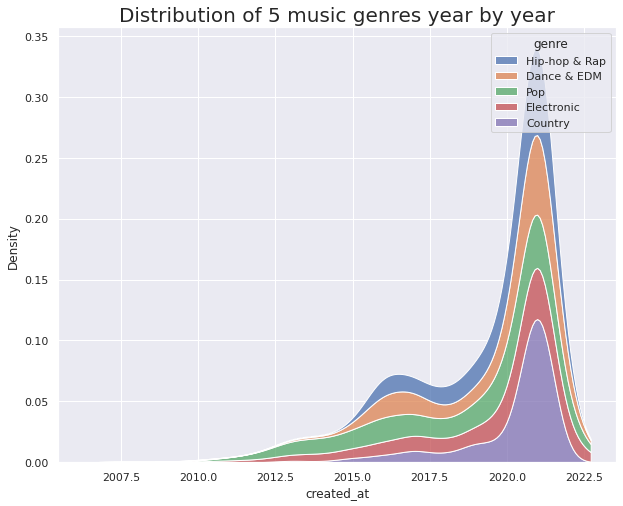

In [35]:
subsetDataFrame['created_at'] = pd.to_datetime(subsetDataFrame['created_at']) # convert string data to datetime object
ax = sns.kdeplot(data=subsetDataFrame, x=subsetDataFrame['created_at'].dt.year, hue="genre", multiple="stack")
ax.set_title("Distribution of 5 music genres year by year",size = 20);

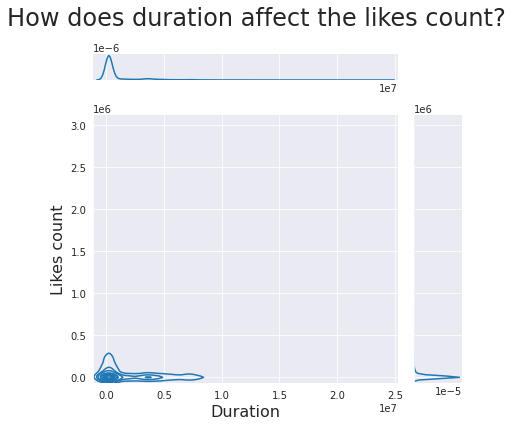

In [5]:
# Plot the jointplot
sns.set_style('darkgrid');
p = sns.jointplot(x='duration',y='likes_count',data=df,kind='kde')

# JointGrid has a convenience function
p.set_axis_labels('Duration', 'Likes count', fontsize=16)
  
# Set title for plot
p.fig.suptitle( "How does duration affect the likes count?" , size = 24 )
  
# Display figure
plt.tight_layout()

In [36]:
df = pd.read_csv (r'users_file.csv',sep='\t')

In [37]:
df

,avatar_url,city,comments_count,country_code,created_at,description,first_name,followers,followers_count,followings,...,station_urn,track_count,uri,urn,user_albums,user_playlist_without_albums,user_top_tracks,user_tracks,username,verified
0,https://i1.sndcdn.com/avatars-000723723973-qtb...,NaN,0,FR,2016-10-12T22:04:43Z,NaN,NaN,235133933,3,"138934049,605567652,235133933,261197982,604286",...,soundcloud:system-playlists:artist-stations:26...,0,https://api.soundcloud.com/users/261128192,soundcloud:users:261128192,NaN,"314247842,593639301,321596631,266859227,296074...",NaN,NaN,adèle,False
1,https://i1.sndcdn.com/avatars-000507859965-mpc...,NaN,0,NaN,2017-10-16T15:41:53Z,NaN,NaN,NaN,0,"141687168,5603465,21113102,96841112,14830753,3...",...,soundcloud:system-playlists:artist-stations:33...,0,https://api.soundcloud.com/users/338315266,soundcloud:users:338315266,NaN,NaN,NaN,NaN,adele,False
2,https://i1.sndcdn.com/avatars-000270857665-bnc...,NaN,0,NaN,2016-05-18T09:17:14Z,NaN,NaN,NaN,3,267075468,...,soundcloud:system-playlists:artist-stations:22...,0,https://api.soundcloud.com/users/227758087,soundcloud:users:227758087,NaN,327168347,NaN,NaN,Adele,False
3,https://i1.sndcdn.com/avatars-000242997710-jw1...,NaN,0,NaN,2016-07-30T15:12:11Z,NaN,Adele,"459549,244431741",6,NaN,...,soundcloud:system-playlists:artist-stations:24...,0,https://api.soundcloud.com/users/244316169,soundcloud:users:244316169,NaN,NaN,NaN,NaN,Adele,False
4,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2021-09-12T23:53:30Z,NaN,Аделина,NaN,0,NaN,...,soundcloud:system-playlists:artist-stations:10...,0,https://api.soundcloud.com/users/1029605386,soundcloud:users:1029605386,NaN,NaN,NaN,NaN,Adele,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,https://i1.sndcdn.com/avatars-001049708419-ld1...,NaN,0,NaN,2021-08-11T10:02:50Z,NaN,Siddharth,NaN,0,NaN,...,soundcloud:system-playlists:artist-stations:10...,0,https://api.soundcloud.com/users/1017825766,soundcloud:users:1017825766,NaN,NaN,NaN,NaN,Imagine Dragon,False
3071,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2019-12-02T22:02:45Z,NaN,NaN,NaN,1,NaN,...,soundcloud:system-playlists:artist-stations:74...,0,https://api.soundcloud.com/users/743142379,soundcloud:users:743142379,NaN,NaN,NaN,NaN,imagine dragon,False
3072,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2013-06-05T20:02:23Z,NaN,NaN,54274065,1,NaN,...,soundcloud:system-playlists:artist-stations:47...,0,https://api.soundcloud.com/users/47083503,soundcloud:users:47083503,NaN,NaN,NaN,NaN,imaginedragon_mus,False
3073,https://i1.sndcdn.com/avatars-000126195889-fqk...,NaN,0,NaN,2015-01-19T22:14:43Z,NaN,NaN,"339069036,116946423",2,"1807424,1078690,1301673,1546189,1722899,114782...",...,soundcloud:system-playlists:artist-stations:13...,0,https://api.soundcloud.com/users/133948403,soundcloud:users:133948403,NaN,954351964,NaN,NaN,imagine12dragon,False


/home/uyen_trang/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/uyen_trang/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


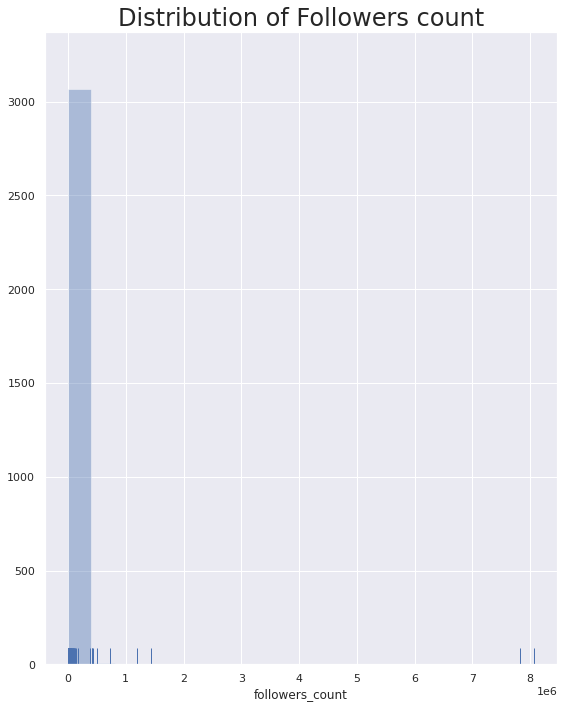

In [17]:
sns.set_style('darkgrid');
sns.distplot(df.followers_count, bins=20, kde=False, rug=True,label = 'Distribution of Followers count');

# Set title for plot
plt.title( "Distribution of Followers count" , size = 24 ) 
# Display figure
plt.tight_layout()

<AxesSubplot:xlabel='followers_count', ylabel='Density'>

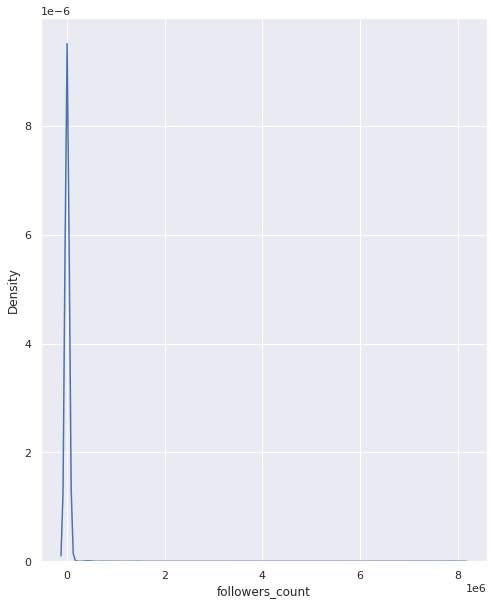

In [18]:
sns.set_style('darkgrid');
sns.kdeplot(data=df,x = 'followers_count')

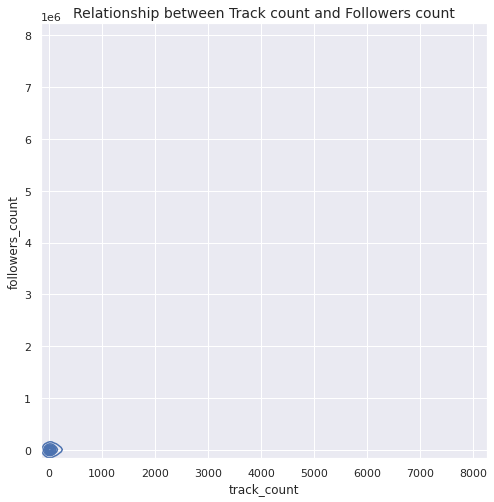

In [38]:
ax = sns.kdeplot(data=df,x = 'track_count',y = 'followers_count')
ax.set_title("Relationship between Track count and Followers count",size = 14);


In [3]:
df = pd.read_csv (r'playlists_file.csv',sep='\t')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013 entries, 0 to 7012
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artwork_url       2691 non-null   object 
 1   created_at        7013 non-null   object 
 2   description       1610 non-null   object 
 3   display_date      7013 non-null   object 
 4   duration          7013 non-null   int64  
 5   embeddable_by     7013 non-null   object 
 6   genre             2768 non-null   object 
 7   id                7013 non-null   int64  
 8   is_album          7013 non-null   bool   
 9   kind              7013 non-null   object 
 10  label_name        482 non-null    object 
 11  last_modified     7013 non-null   object 
 12  license           7013 non-null   object 
 13  likers            3610 non-null   object 
 14  likes_count       7013 non-null   int64  
 15  managed_by_feeds  7013 non-null   bool   
 16  permalink         7013 non-null   object 


In [5]:
df_corr = df[['duration','likes_count','reposts_count','track_count']]

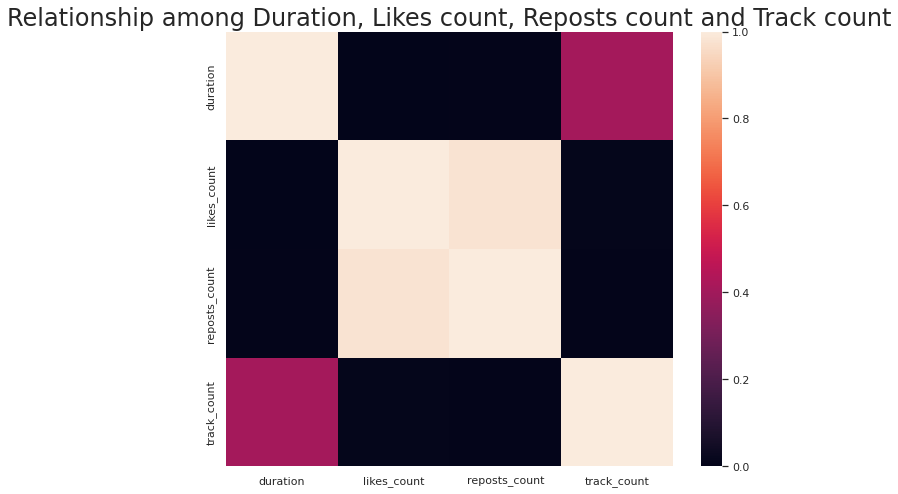

In [11]:
sns.heatmap(df_corr.corr())
sns.set(rc={'figure.figsize':(8,10)})
plt.title("Relationship among Duration, Likes count, Reposts count and Track count",size = 24)
plt.show()

<AxesSubplot:xlabel='duration', ylabel='Density'>

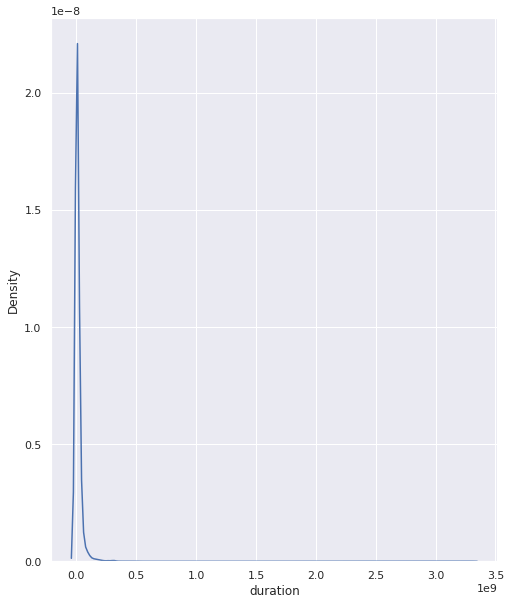

In [13]:
sns.kdeplot(data=df_corr,x= 'duration')